数据加载成功！共 6 部电影，核心字段如下：


,电影名称,总票房(亿),上映日期,排片率(%),豆瓣评分,导演,主演,抖音话题播放量(亿),抖音点赞数(万),档期类型,是否含流量演员,档期类型编码,预测票房(亿),抖音话题播放量(亿)_重要性,排片率(%)_重要性,豆瓣评分_重要性,是否含流量演员_重要性,档期类型编码_重要性,模型MAE,模型R2
0,流浪地球3,9.29,2024-10-23,23.80,5.7,陈思诚,"贾玲,张译,易烊千玺",22.09,926.48,普通档,1,0,33.846897,0.693955,0.197559,0.108486,0.0,0.0,15.476897,-2.905334
1,满江红2,27.45,2024-07-13,30.82,5.3,吴京,"易烊千玺,张译,吴京",56.18,30.24,普通档,1,0,33.846897,0.693955,0.197559,0.108486,0.0,0.0,15.476897,-2.905334
2,唐探4,28.91,2024-07-9,14.27,5.3,张艺谋,吴京,19.27,457.40,普通档,1,0,28.952755,0.693955,0.197559,0.108486,0.0,0.0,15.476897,-2.905334


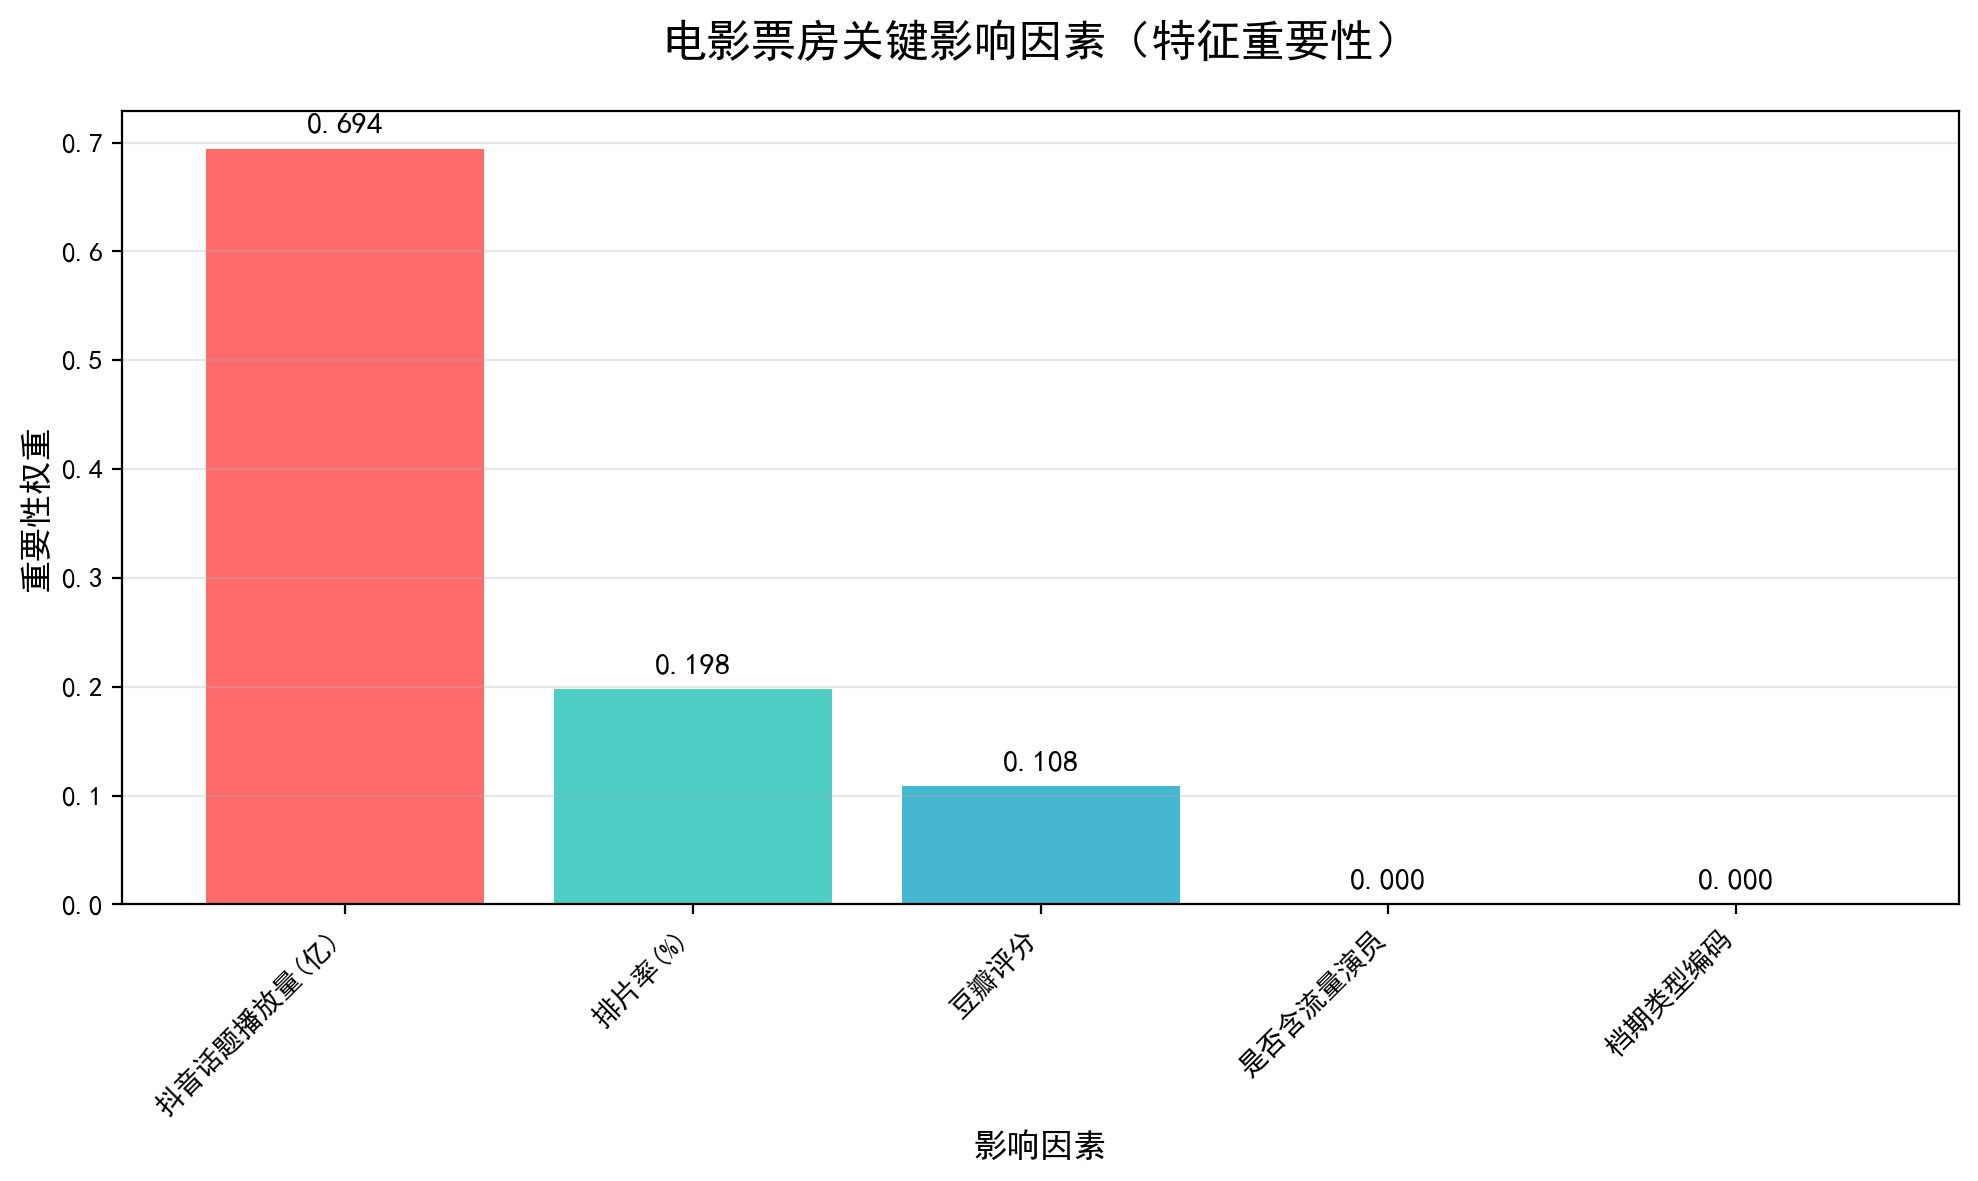

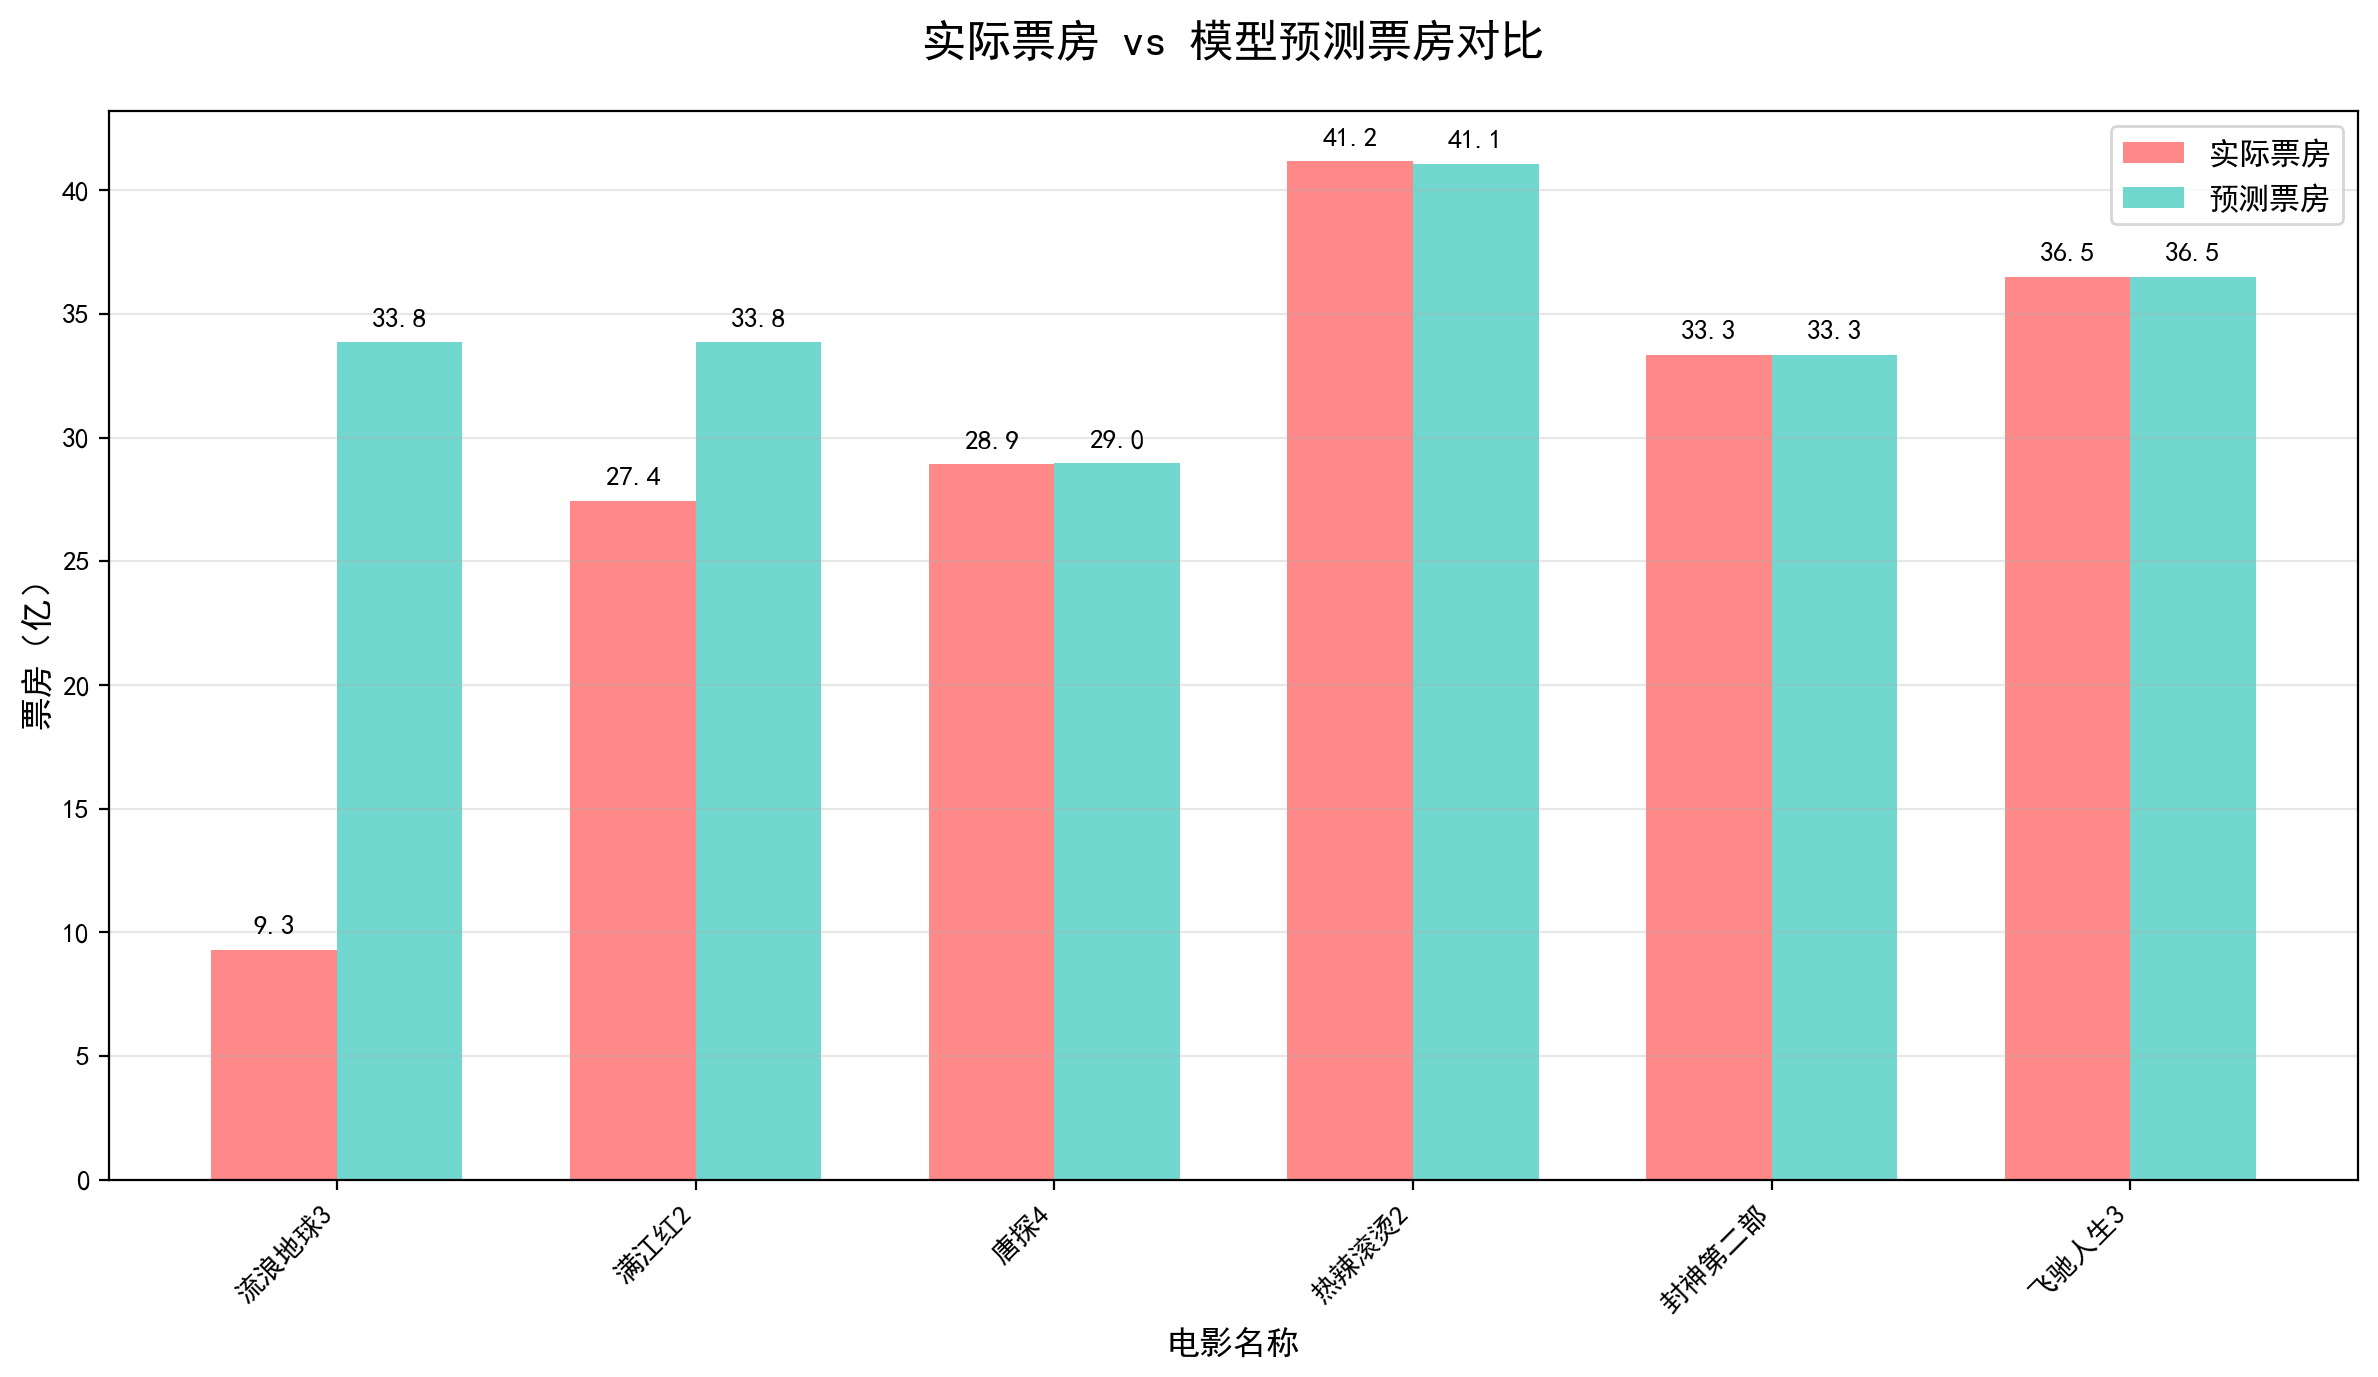

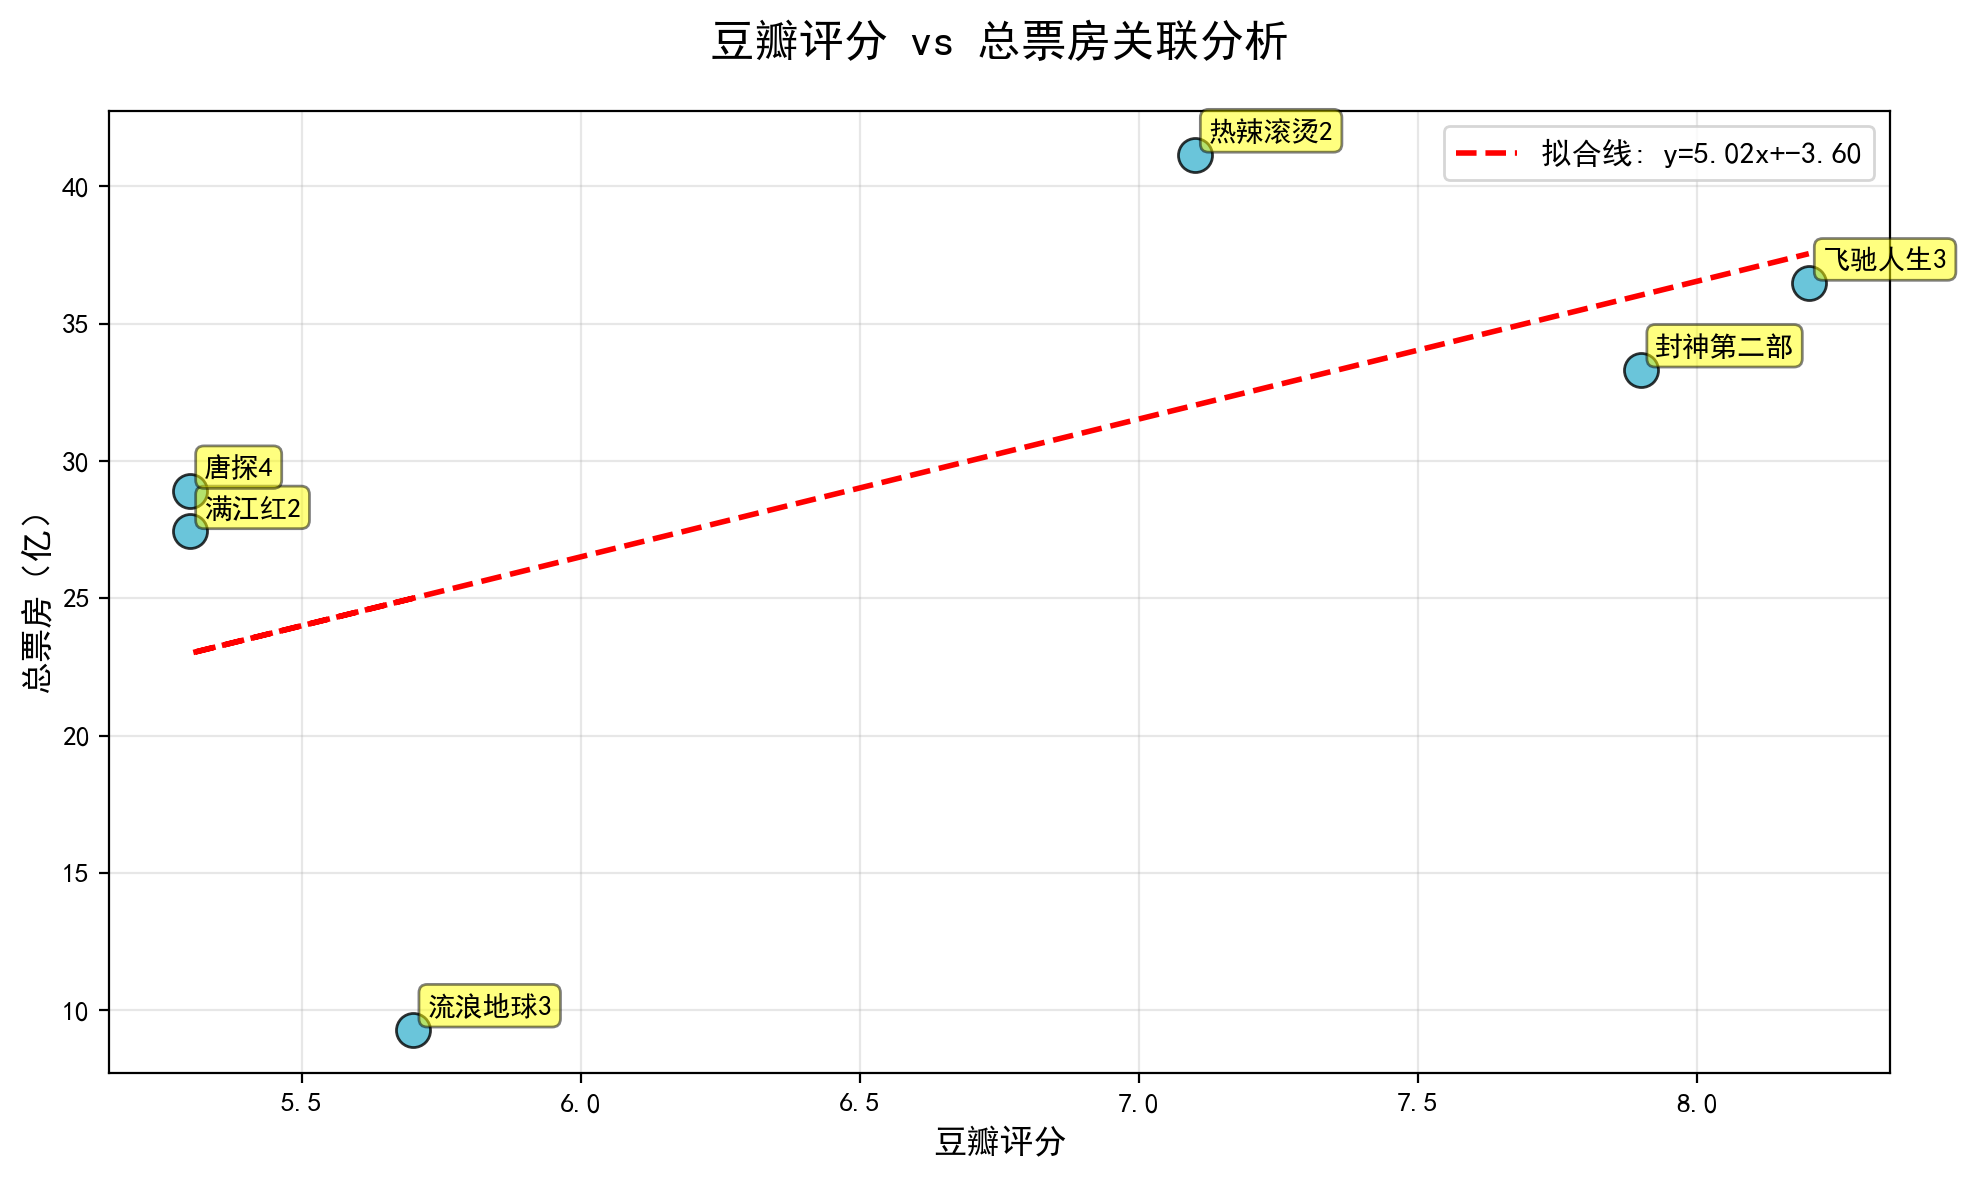

综合分析图表已保存为：movie_analysis_jupyter.png


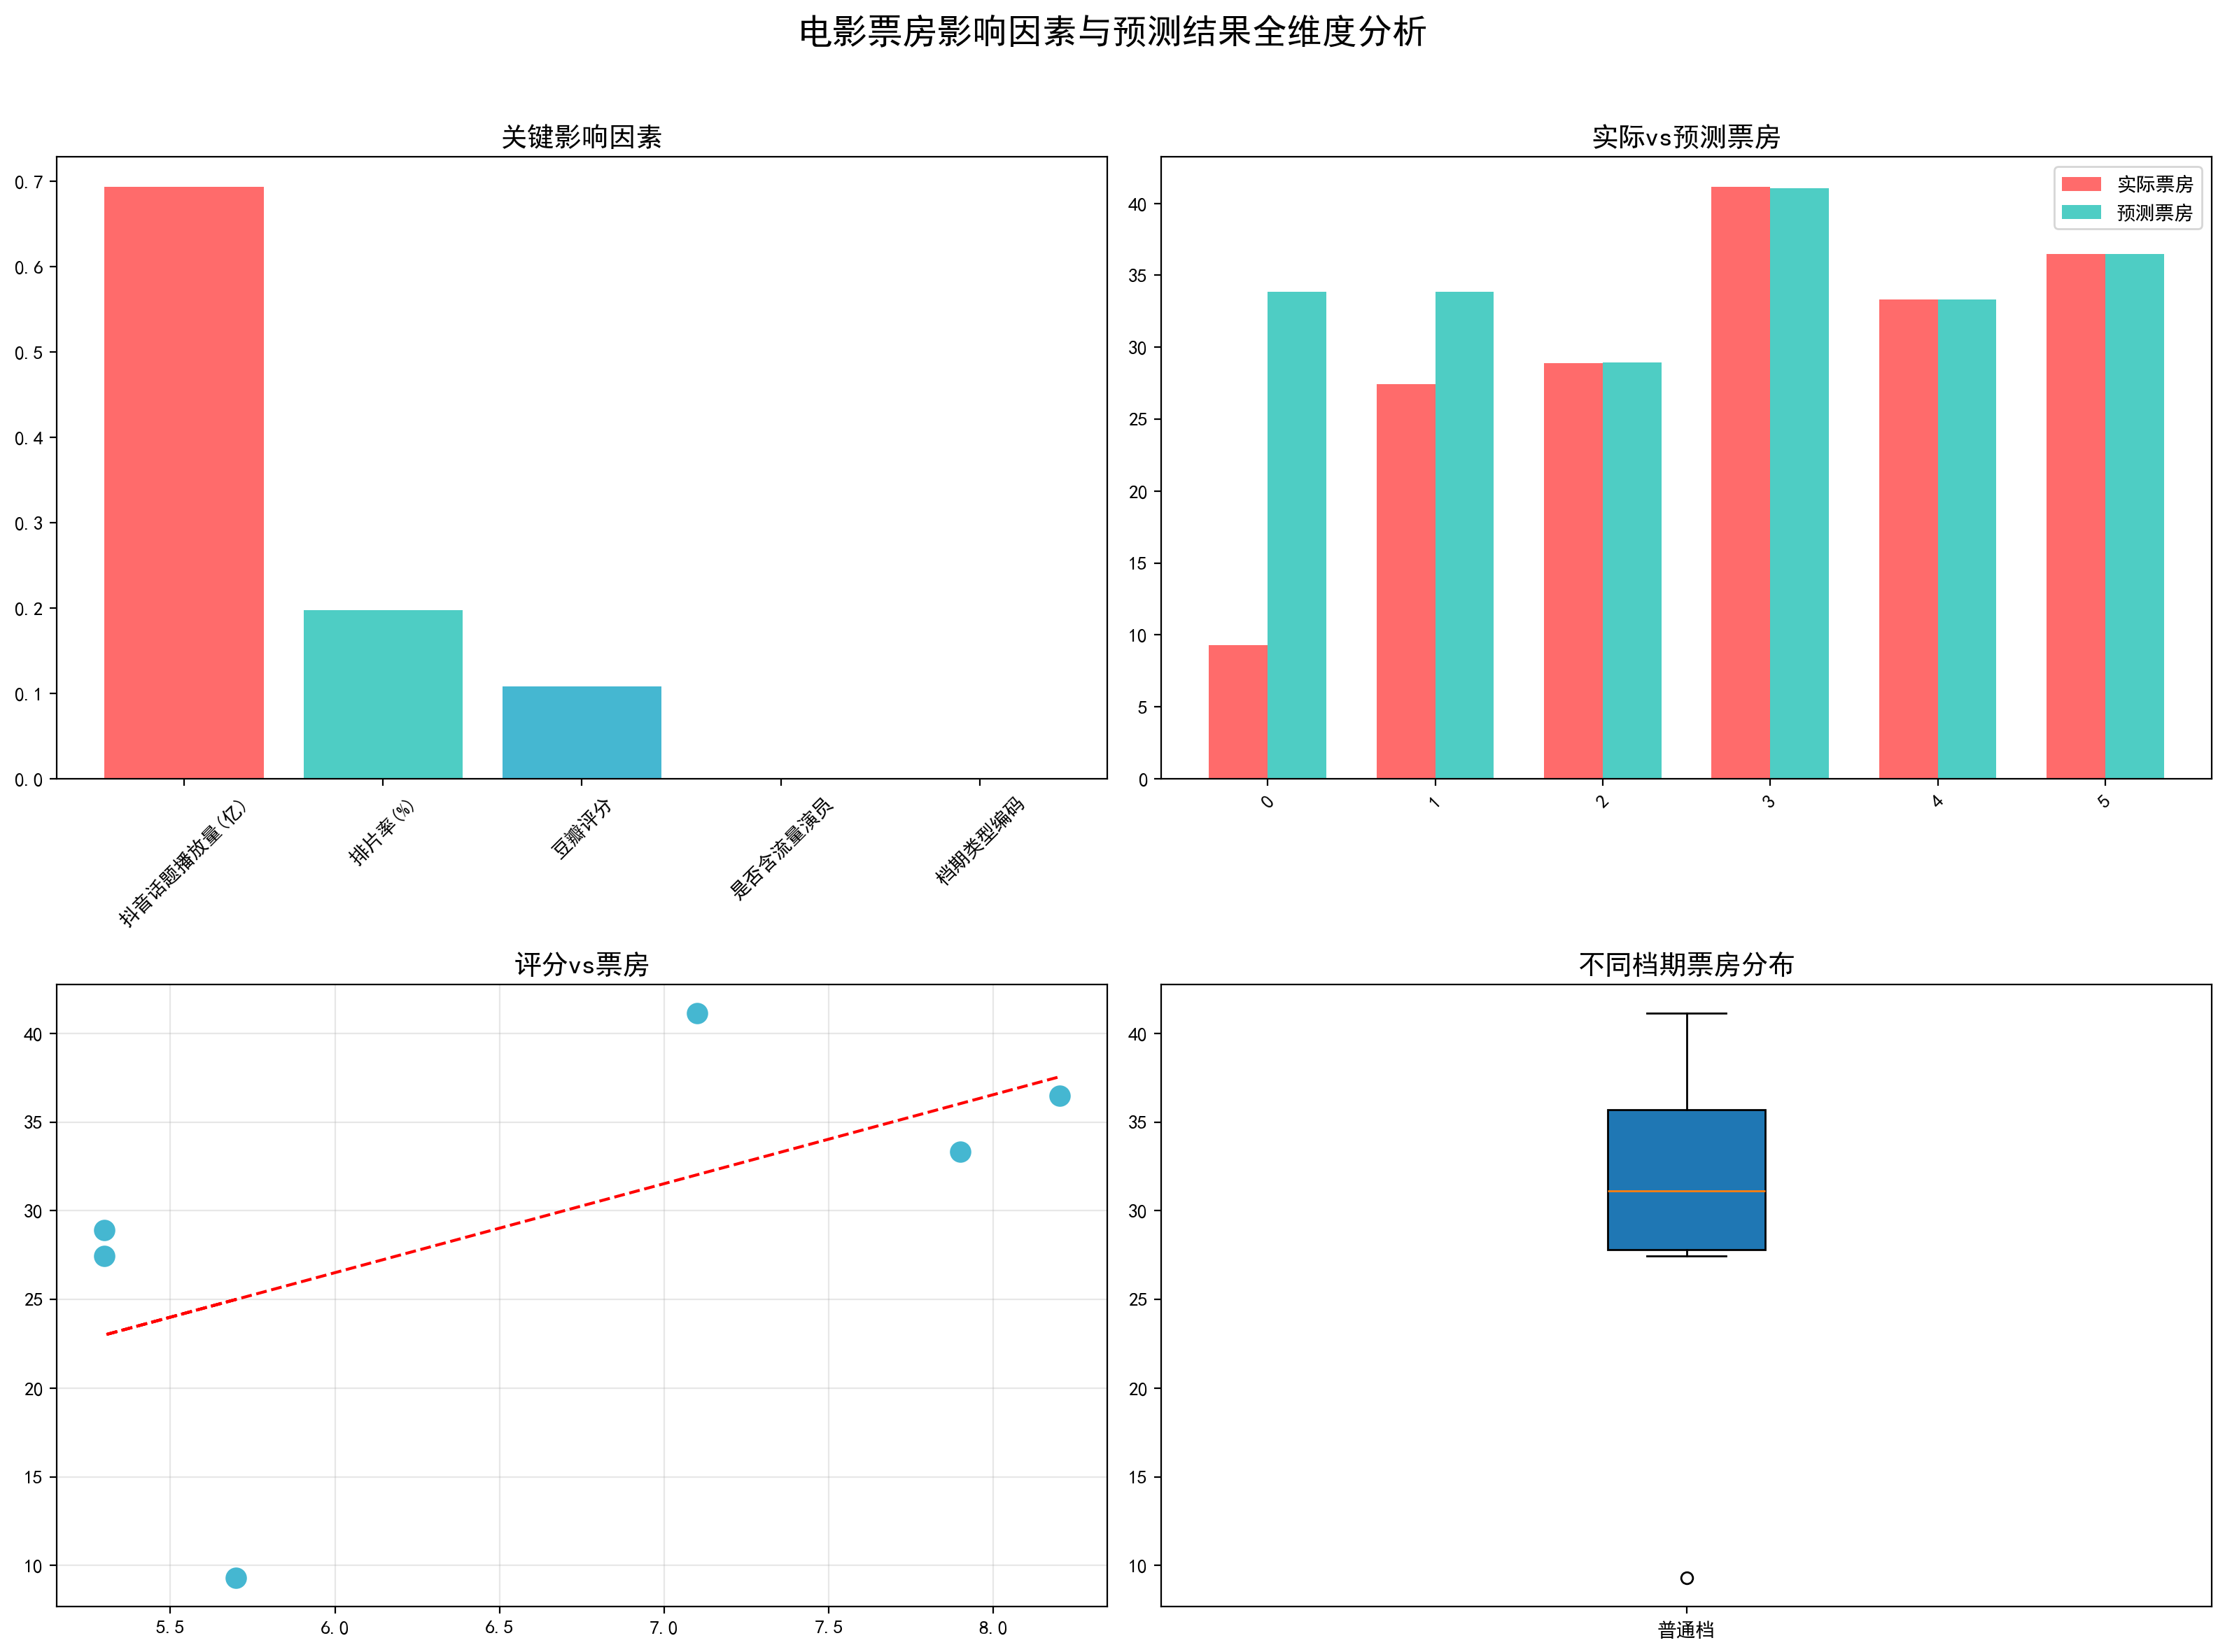

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 简化且适配Windows的字体配置（消除警告）
plt.rcParams["font.family"] = "SimHei"  # 仅保留系统必有的黑体
plt.rcParams["axes.unicode_minus"] = False  
plt.rcParams["figure.figsize"] = (12, 8)  

# 魔法命令单独行（无注释）
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 加载数据函数（无emoji，避免渲染问题）
def load_movie_data(file_path="./movie_box_office_analysis.csv"):
    try:
        df = pd.read_csv(file_path, encoding="utf-8-sig")
        print(f"数据加载成功！共 {len(df)} 部电影，核心字段如下：")
        display(df.head(3))
        return df
    except FileNotFoundError:
        print(f"未找到文件：{file_path}，请先运行票房分析代码生成CSV")
        return None

df = load_movie_data()
# 提取特征重要性数据
if df is not None:
    # 筛选重要性列
    importance_cols = [col for col in df.columns if "重要性" in col and "模型" not in col]
    feature_names = [col.replace("_重要性", "") for col in importance_cols]
    importance_values = df[importance_cols].iloc[0].values  # 所有行值相同，取第一行
    
    # 绘制柱状图
    plt.figure(figsize=(10, 6))
    colors = ["#FF6B6B", "#4ECDC4", "#45B7D1", "#96CEB4", "#FFEAA7"]
    bars = plt.bar(feature_names, importance_values, color=colors[:len(feature_names)])
    
    # 美化配置（Jupyter专属：更精致的样式）
    plt.title("电影票房关键影响因素（特征重要性）", fontsize=16, fontweight="bold", pad=20)
    plt.xlabel("影响因素", fontsize=12)
    plt.ylabel("重要性权重", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", alpha=0.3)
    
    # 标注数值
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f"{height:.3f}", ha="center", va="bottom", fontsize=11, fontweight="bold")
    
    plt.tight_layout()
    plt.show()
if df is not None:
    plt.figure(figsize=(12, 7))
    x = np.arange(len(df["电影名称"]))
    width = 0.35
    
    # 双条形图
    bars1 = plt.bar(x - width/2, df["总票房(亿)"], width, label="实际票房", color="#FF6B6B", alpha=0.8)
    bars2 = plt.bar(x + width/2, df["预测票房(亿)"], width, label="预测票房", color="#4ECDC4", alpha=0.8)
    
    # 美化配置
    plt.title("实际票房 vs 模型预测票房对比", fontsize=16, fontweight="bold", pad=20)
    plt.xlabel("电影名称", fontsize=12)
    plt.ylabel("票房（亿）", fontsize=12)
    plt.xticks(x, df["电影名称"], rotation=45, ha="right")
    plt.legend(fontsize=11)
    plt.grid(axis="y", alpha=0.3)
    
    # 标注数值
    for bar in bars1:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                 f"{height:.1f}", ha="center", va="bottom", fontsize=10)
    for bar in bars2:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                 f"{height:.1f}", ha="center", va="bottom", fontsize=10)
    
    plt.tight_layout()
    plt.show()
if df is not None:
    plt.figure(figsize=(10, 6))
    
    # 散点图（Jupyter中更清晰）
    scatter = plt.scatter(df["豆瓣评分"], df["总票房(亿)"], 
                          s=150, c="#45B7D1", alpha=0.8, 
                          edgecolors="black", linewidth=1)
    
    # 拟合线（展示相关性）
    z = np.polyfit(df["豆瓣评分"], df["总票房(亿)"], 1)
    p = np.poly1d(z)
    plt.plot(df["豆瓣评分"], p(df["豆瓣评分"]), "r--", linewidth=2, 
             label=f"拟合线: y={z[0]:.2f}x+{z[1]:.2f}")
    
    # 标注电影名称（Jupyter交互友好）
    for idx, row in df.iterrows():
        plt.annotate(row["电影名称"], (row["豆瓣评分"], row["总票房(亿)"]),
                     xytext=(5, 5), textcoords="offset points", 
                     fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.5))
    
    # 美化配置
    plt.title("豆瓣评分 vs 总票房关联分析", fontsize=16, fontweight="bold", pad=20)
    plt.xlabel("豆瓣评分", fontsize=12)
    plt.ylabel("总票房（亿）", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=11)
    
    plt.tight_layout()
    plt.show()
# 一键保存所有图表（Jupyter中执行）
if df is not None:
    # 重新绘制综合图表并保存
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle("电影票房影响因素与预测结果全维度分析", fontsize=18, fontweight="bold")
    
    # 子图1：特征重要性
    ax1.bar(feature_names, importance_values, color=colors[:len(feature_names)])
    ax1.set_title("关键影响因素", fontsize=14, fontweight="bold")
    ax1.tick_params(axis="x", rotation=45)
    
    # 子图2：实际vs预测票房
    ax2.bar(x - width/2, df["总票房(亿)"], width, label="实际票房", color="#FF6B6B")
    ax2.bar(x + width/2, df["预测票房(亿)"], width, label="预测票房", color="#4ECDC4")
    ax2.set_title("实际vs预测票房", fontsize=14, fontweight="bold")
    ax2.tick_params(axis="x", rotation=45)
    ax2.legend()
    
    # 子图3：评分vs票房
    ax3.scatter(df["豆瓣评分"], df["总票房(亿)"], c="#45B7D1", s=100)
    ax3.plot(df["豆瓣评分"], p(df["豆瓣评分"]), "r--")
    ax3.set_title("评分vs票房", fontsize=14, fontweight="bold")
    ax3.grid(alpha=0.3)
    
    # 子图4：档期票房分布
    schedule_groups = df.groupby("档期类型")["总票房(亿)"].apply(list)
    ax4.boxplot([schedule_groups[label] for label in schedule_groups.index], 
            tick_labels=schedule_groups.index, patch_artist=True)
    ax4.set_title("不同档期票房分布", fontsize=14, fontweight="bold")
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    # 保存高清图片到当前目录
    plt.savefig("./movie_analysis_jupyter.png", dpi=300, bbox_inches="tight")
    print("综合分析图表已保存为：movie_analysis_jupyter.png")
    plt.show()

In [1]:
!pip install pandas matplotlib seaborn wordcloud jieba scikit-learn -q

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# 配置Jupyter中文+高清显示
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["figure.figsize"] = (12, 8)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# 配置Jupyter中文+高清显示
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["figure.figsize"] = (12, 8)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# 加载票房数据（替换为你的CSV路径）
df = pd.read_csv("./movie_box_office_analysis.csv", encoding="utf-8-sig")

# 模拟影评数据（若你的数据含影评，可直接读取）
df["影评"] = [
    "特效炸裂，剧情紧凑，国产科幻天花板！",
    "笑点密集，沈腾演技依旧在线，春节档必看！",
    "剧情拖沓，逻辑混乱，浪费演员阵容",
    "女性视角很细腻，情感共鸣强，哭了好几次",
    "场面宏大，特效惊艳，但故事线太散",
    "节奏明快，适合全家观影，春节档黑马"
]
display(df[["电影名称", "影评"]].head())

,电影名称,影评
0,流浪地球3,特效炸裂，剧情紧凑，国产科幻天花板！
1,满江红2,笑点密集，沈腾演技依旧在线，春节档必看！
2,唐探4,剧情拖沓，逻辑混乱，浪费演员阵容
3,热辣滚烫2,女性视角很细腻，情感共鸣强，哭了好几次
4,封神第二部,场面宏大，特效惊艳，但故事线太散


,电影名称,影评
0,流浪地球3,特效炸裂，剧情紧凑，国产科幻天花板！
1,满江红2,笑点密集，沈腾演技依旧在线，春节档必看！
2,唐探4,剧情拖沓，逻辑混乱，浪费演员阵容
3,热辣滚烫2,女性视角很细腻，情感共鸣强，哭了好几次
4,封神第二部,场面宏大，特效惊艳，但故事线太散


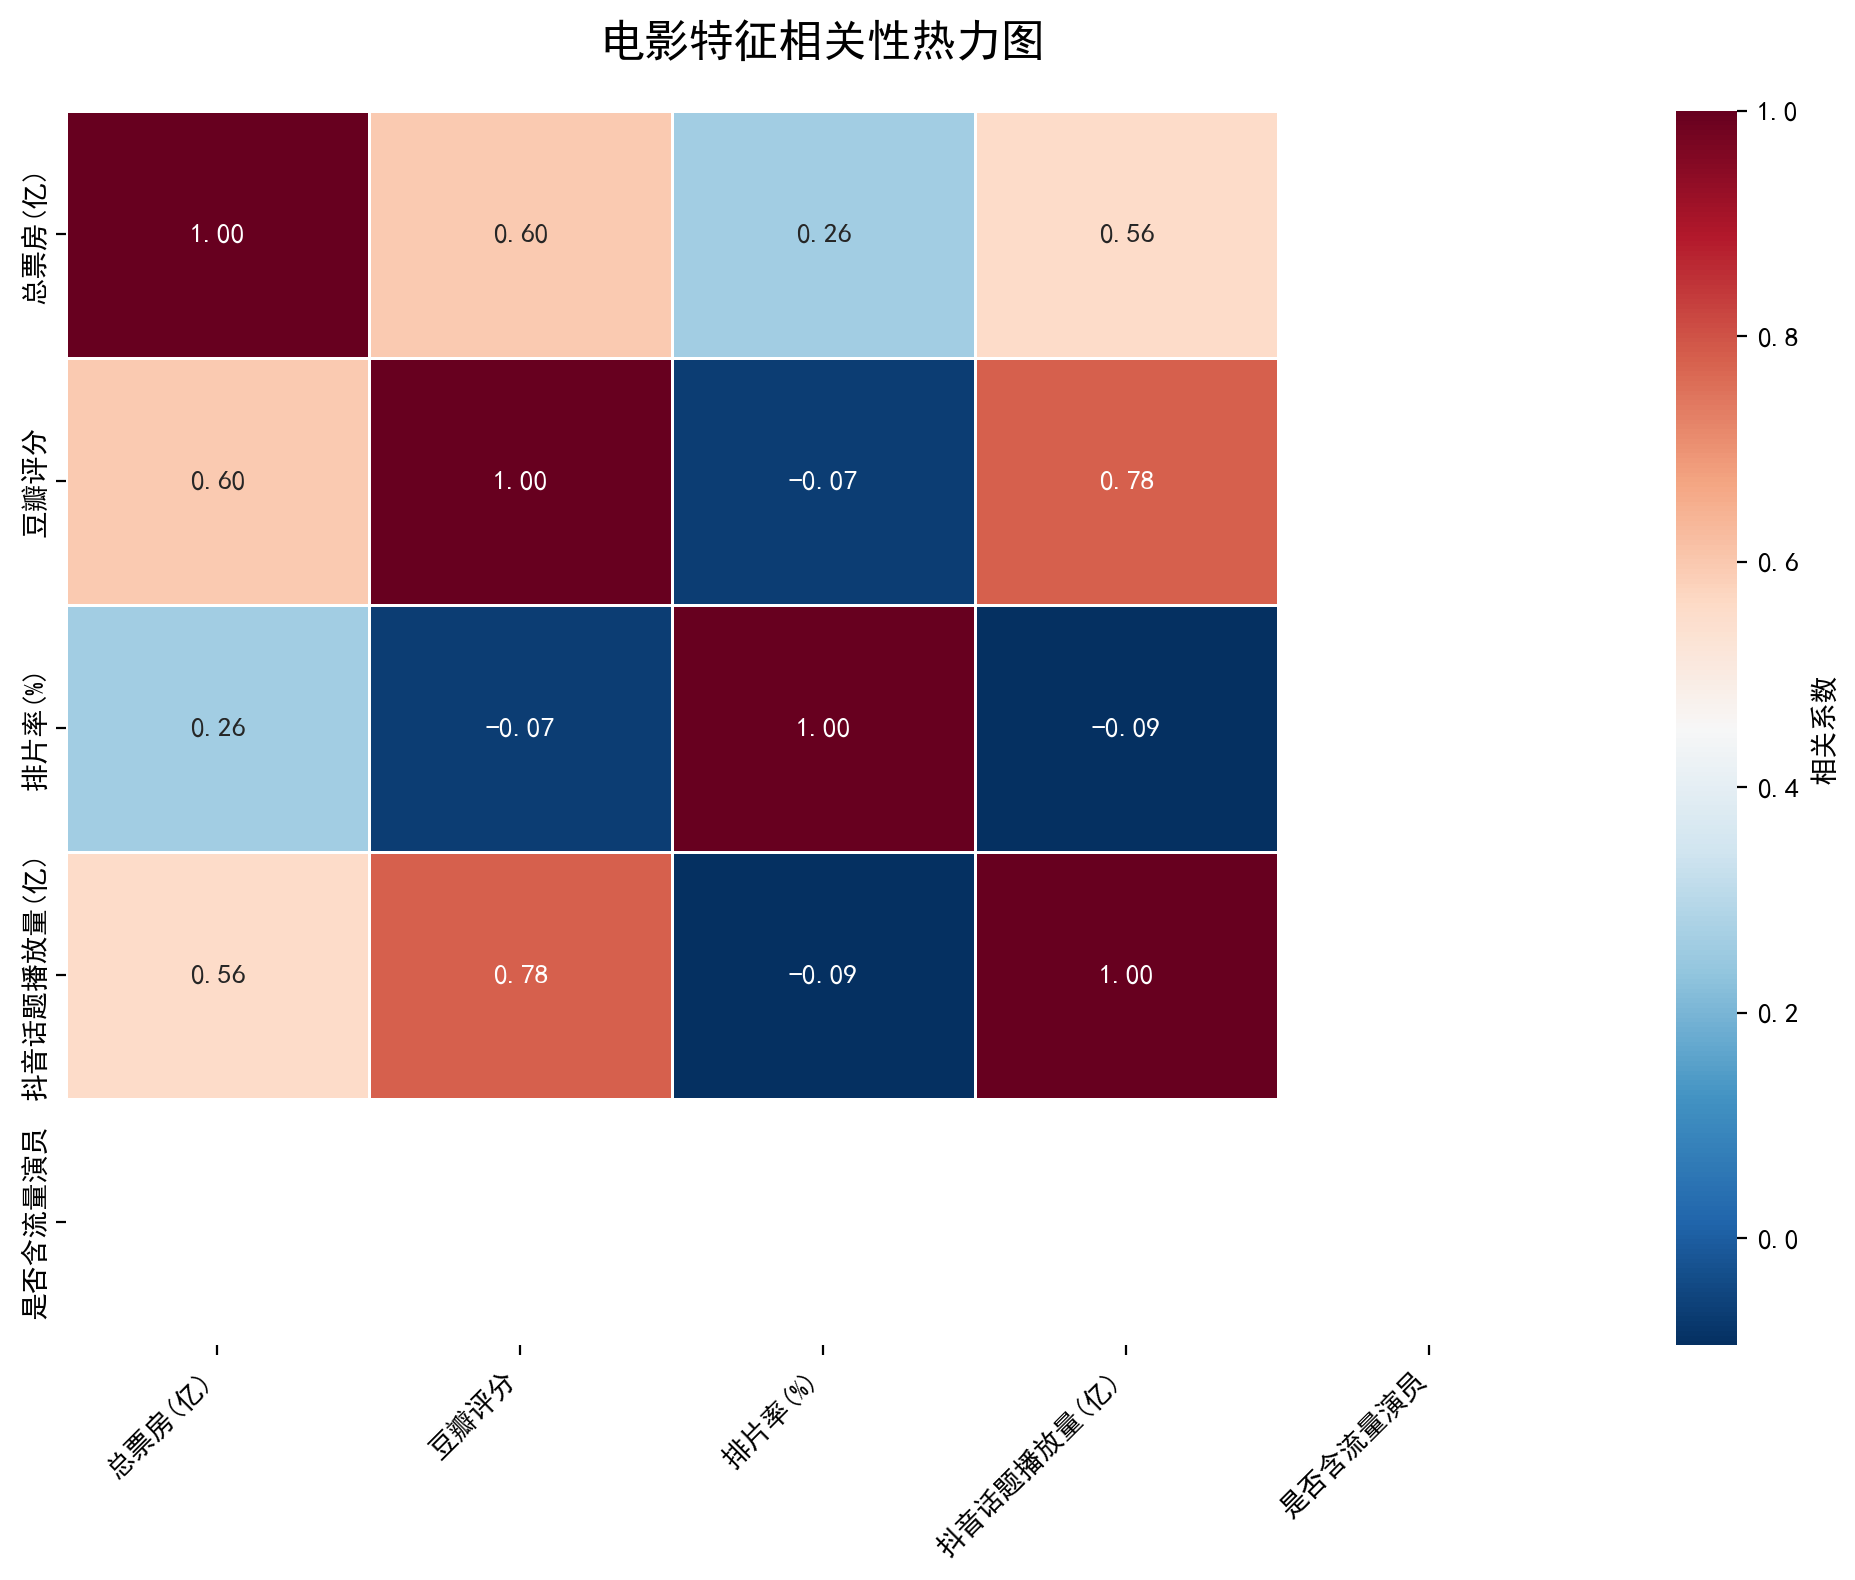

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# 配置Jupyter中文+高清显示
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["figure.figsize"] = (12, 8)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# 加载票房数据（替换为你的CSV路径）
df = pd.read_csv("./movie_box_office_analysis.csv", encoding="utf-8-sig")

# 模拟影评数据（若你的数据含影评，可直接读取）
df["影评"] = [
    "特效炸裂，剧情紧凑，国产科幻天花板！",
    "笑点密集，沈腾演技依旧在线，春节档必看！",
    "剧情拖沓，逻辑混乱，浪费演员阵容",
    "女性视角很细腻，情感共鸣强，哭了好几次",
    "场面宏大，特效惊艳，但故事线太散",
    "节奏明快，适合全家观影，春节档黑马"
]
display(df[["电影名称", "影评"]].head())
def plot_heatmap(df):
    # 筛选数值型特征
    numeric_cols = ["总票房(亿)", "豆瓣评分", "排片率(%)", "抖音话题播放量(亿)", "是否含流量演员"]
    corr_matrix = df[numeric_cols].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        corr_matrix,
        annot=True,  # 显示相关系数
        cmap="RdBu_r",
        fmt=".2f",
        linewidths=0.5,
        cbar_kws={"label": "相关系数"}
    )
    plt.title("电影特征相关性热力图", fontsize=16, fontweight="bold", pad=20)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# 执行
plot_heatmap(df)

,电影名称,影评
0,流浪地球3,特效炸裂，剧情紧凑，国产科幻天花板！
1,满江红2,笑点密集，沈腾演技依旧在线，春节档必看！
2,唐探4,剧情拖沓，逻辑混乱，浪费演员阵容
3,热辣滚烫2,女性视角很细腻，情感共鸣强，哭了好几次
4,封神第二部,场面宏大，特效惊艳，但故事线太散


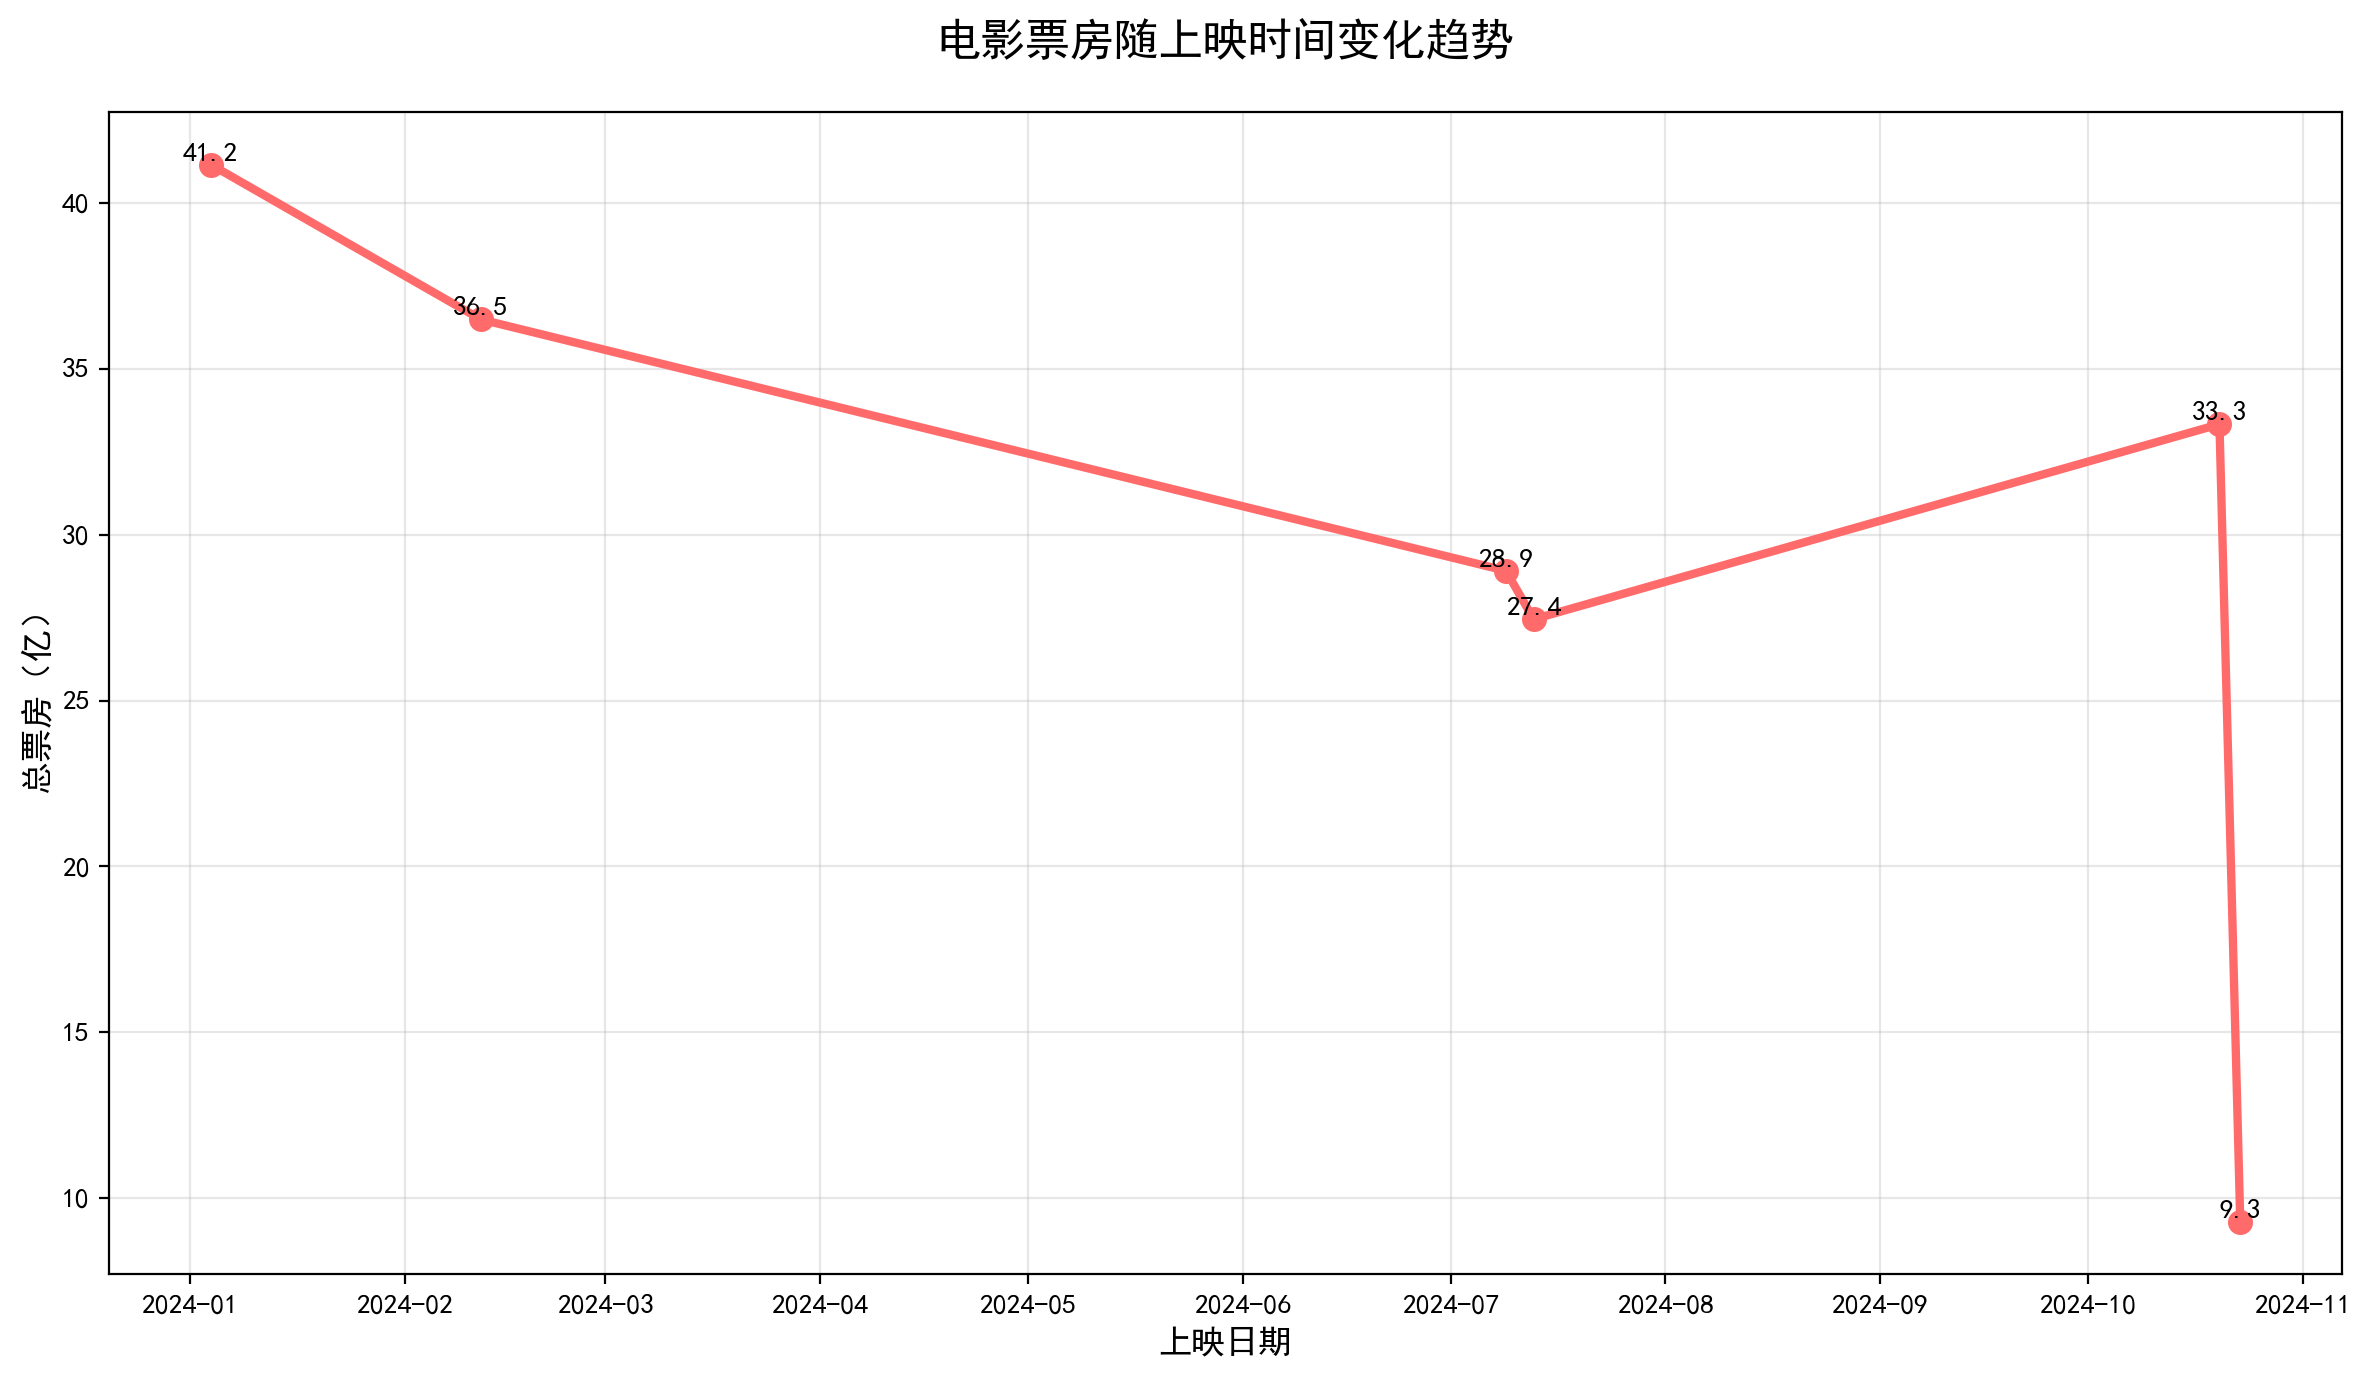

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# 配置Jupyter中文+高清显示
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["figure.figsize"] = (12, 8)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# 加载票房数据（替换为你的CSV路径）
df = pd.read_csv("./movie_box_office_analysis.csv", encoding="utf-8-sig")

# 模拟影评数据（若你的数据含影评，可直接读取）
df["影评"] = [
    "特效炸裂，剧情紧凑，国产科幻天花板！",
    "笑点密集，沈腾演技依旧在线，春节档必看！",
    "剧情拖沓，逻辑混乱，浪费演员阵容",
    "女性视角很细腻，情感共鸣强，哭了好几次",
    "场面宏大，特效惊艳，但故事线太散",
    "节奏明快，适合全家观影，春节档黑马"
]
display(df[["电影名称", "影评"]].head())
def plot_boxoffice_trend(df):
    # 处理时间格式（假设你的数据含"上映日期"）
    df["上映日期"] = pd.to_datetime(df["上映日期"])
    df_sorted = df.sort_values("上映日期")
    
    plt.figure(figsize=(12, 7))
    plt.plot(
        df_sorted["上映日期"],
        df_sorted["总票房(亿)"],
        color="#FF6B6B",
        linewidth=3,
        marker="o",
        markersize=8
    )
    # 标注票房
    for idx, row in df_sorted.iterrows():
        plt.text(
            row["上映日期"],
            row["总票房(亿)"],
            f"{row['总票房(亿)']:.1f}",
            ha="center",
            va="bottom",
            fontsize=10
        )
    
    plt.title("电影票房随上映时间变化趋势", fontsize=16, fontweight="bold", pad=20)
    plt.xlabel("上映日期", fontsize=12)
    plt.ylabel("总票房（亿）", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# 执行
plot_boxoffice_trend(df)

,电影名称,影评
0,流浪地球3,特效炸裂，剧情紧凑，国产科幻天花板！
1,满江红2,笑点密集，沈腾演技依旧在线，春节档必看！
2,唐探4,剧情拖沓，逻辑混乱，浪费演员阵容
3,热辣滚烫2,女性视角很细腻，情感共鸣强，哭了好几次
4,封神第二部,场面宏大，特效惊艳，但故事线太散


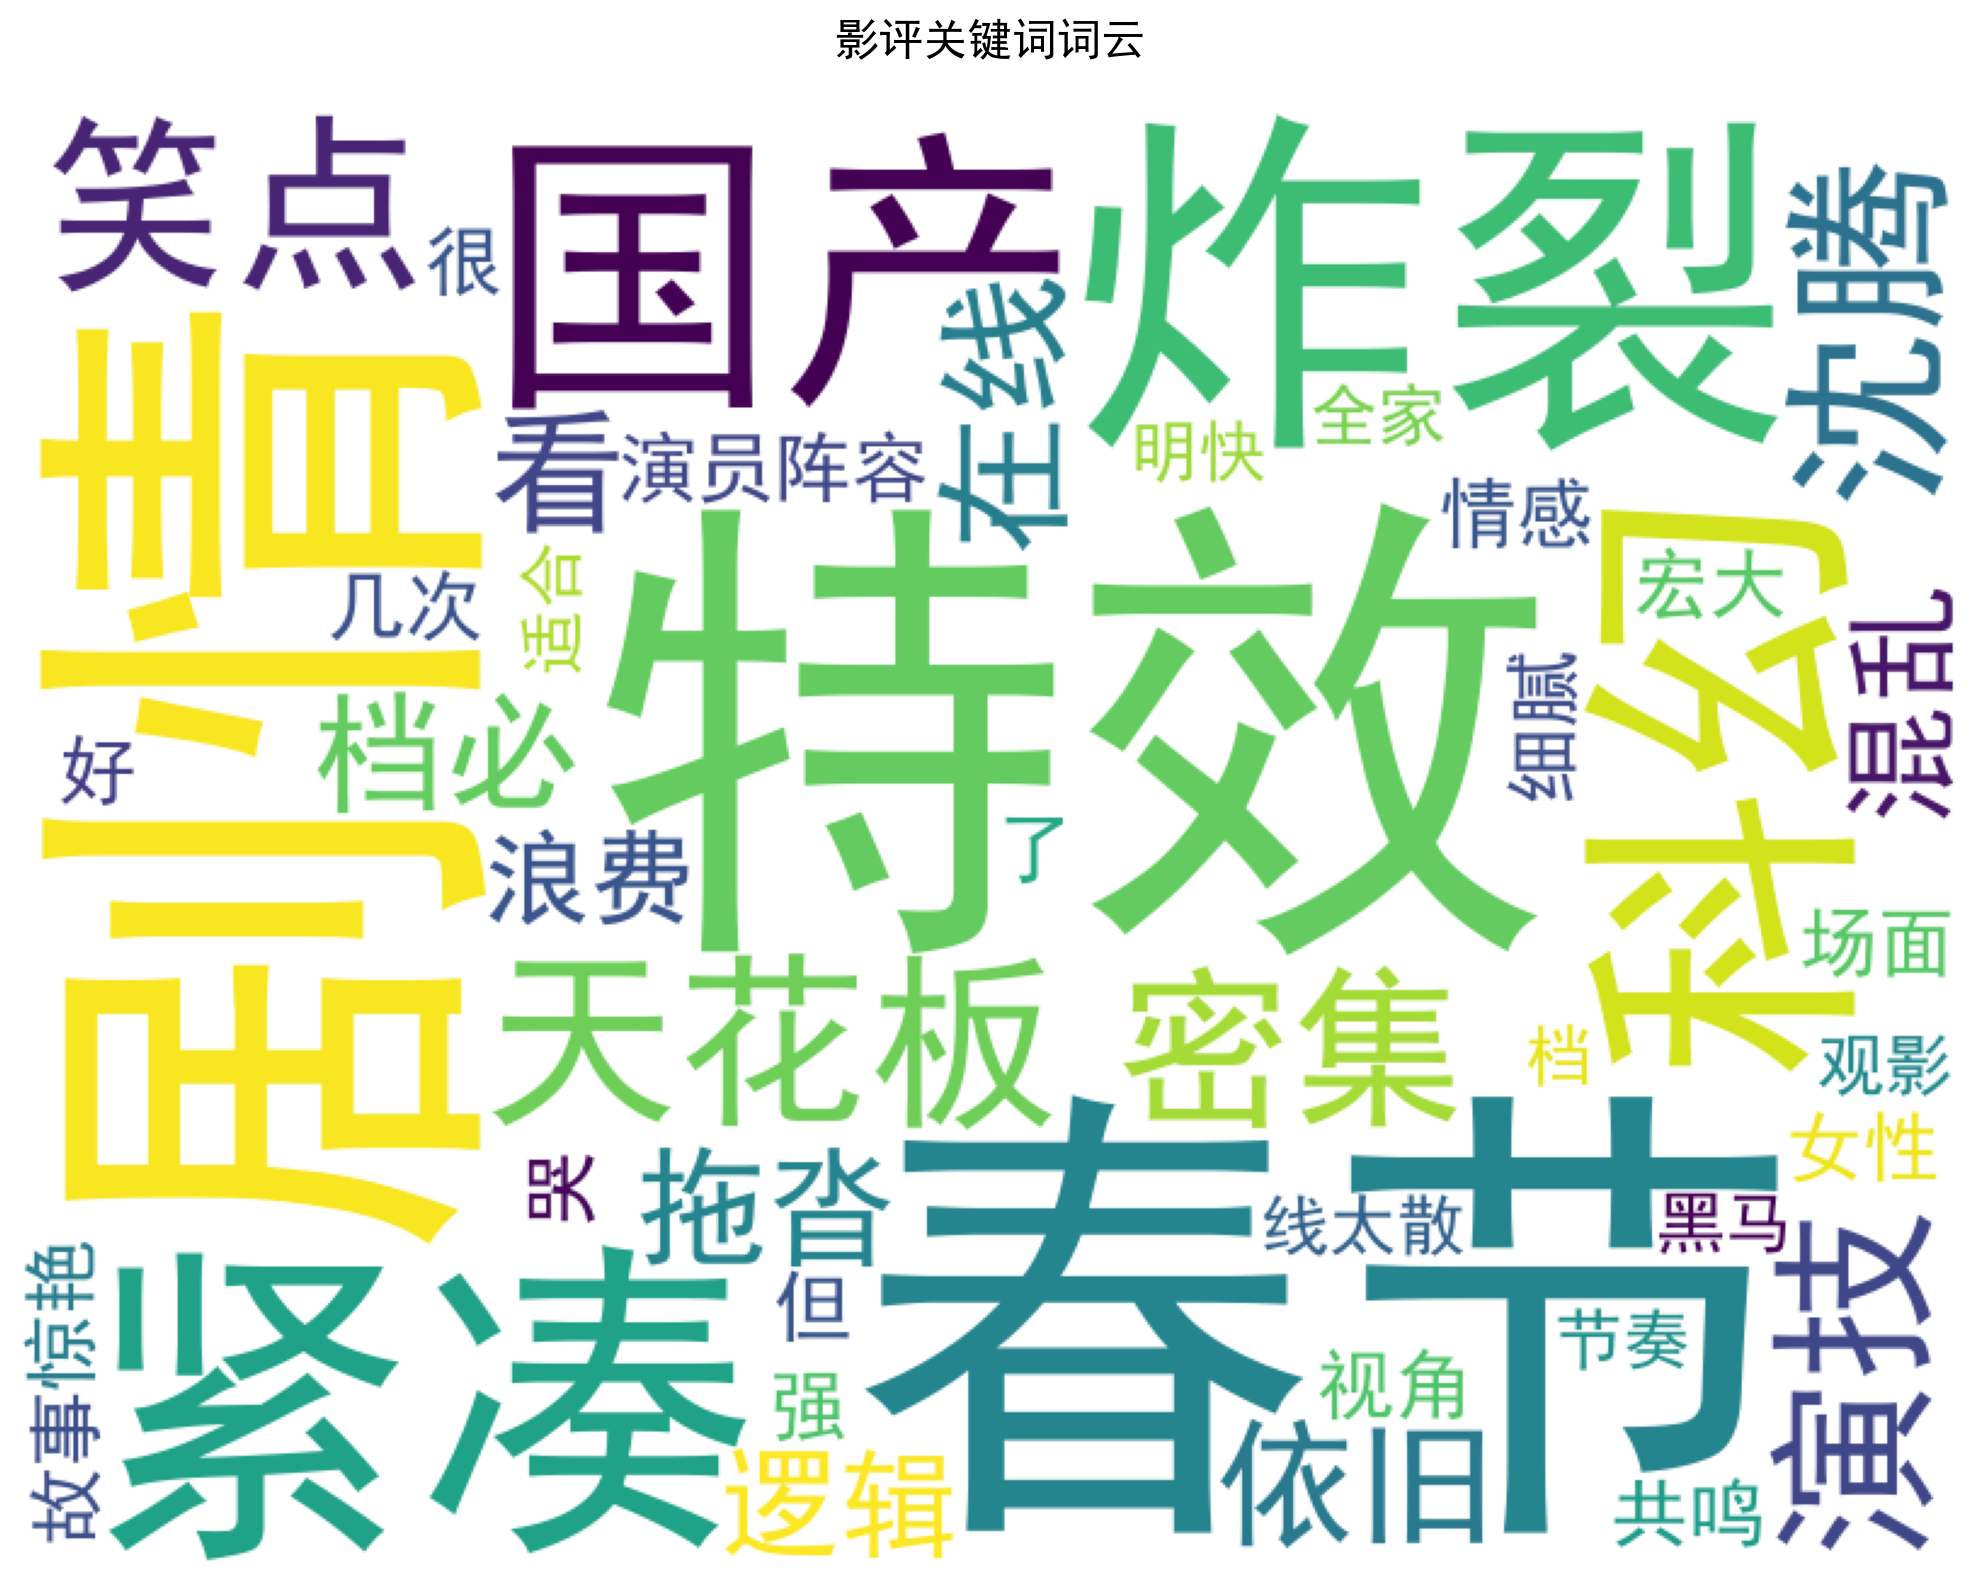

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# 配置Jupyter中文+高清显示
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["figure.figsize"] = (12, 8)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# 加载票房数据（替换为你的CSV路径）
df = pd.read_csv("./movie_box_office_analysis.csv", encoding="utf-8-sig")

# 模拟影评数据（若你的数据含影评，可直接读取）
df["影评"] = [
    "特效炸裂，剧情紧凑，国产科幻天花板！",
    "笑点密集，沈腾演技依旧在线，春节档必看！",
    "剧情拖沓，逻辑混乱，浪费演员阵容",
    "女性视角很细腻，情感共鸣强，哭了好几次",
    "场面宏大，特效惊艳，但故事线太散",
    "节奏明快，适合全家观影，春节档黑马"
]
display(df[["电影名称", "影评"]].head())

def plot_wordcloud(df):
    # 分词+拼接影评
    jieba.setLogLevel(jieba.logging.INFO)
    all_comments = " ".join(df["影评"].tolist())
    words = jieba.lcut(all_comments)
    word_text = " ".join(words)
    
    # 生成词云并转换为图像
    wc = WordCloud(
        font_path="C:/Windows/Fonts/simhei.ttf",
        width=800,
        height=600,
        background_color="white",
        max_words=50,
        colormap="viridis"
    ).generate(word_text)
    wc_image = wc.to_image()  # 转换为PIL图像
    
    # 显示图像
    plt.figure(figsize=(10, 8))
    plt.imshow(wc_image)  # 传入PIL图像
    plt.axis("off")
    plt.title("影评关键词词云", fontsize=16, fontweight="bold", pad=20)
    plt.tight_layout()
    plt.show()

# 执行
plot_wordcloud(df)

,电影名称,影评
0,流浪地球3,特效炸裂，剧情紧凑，国产科幻天花板！
1,满江红2,笑点密集，沈腾演技依旧在线，春节档必看！
2,唐探4,剧情拖沓，逻辑混乱，浪费演员阵容
3,热辣滚烫2,女性视角很细腻，情感共鸣强，哭了好几次
4,封神第二部,场面宏大，特效惊艳，但故事线太散


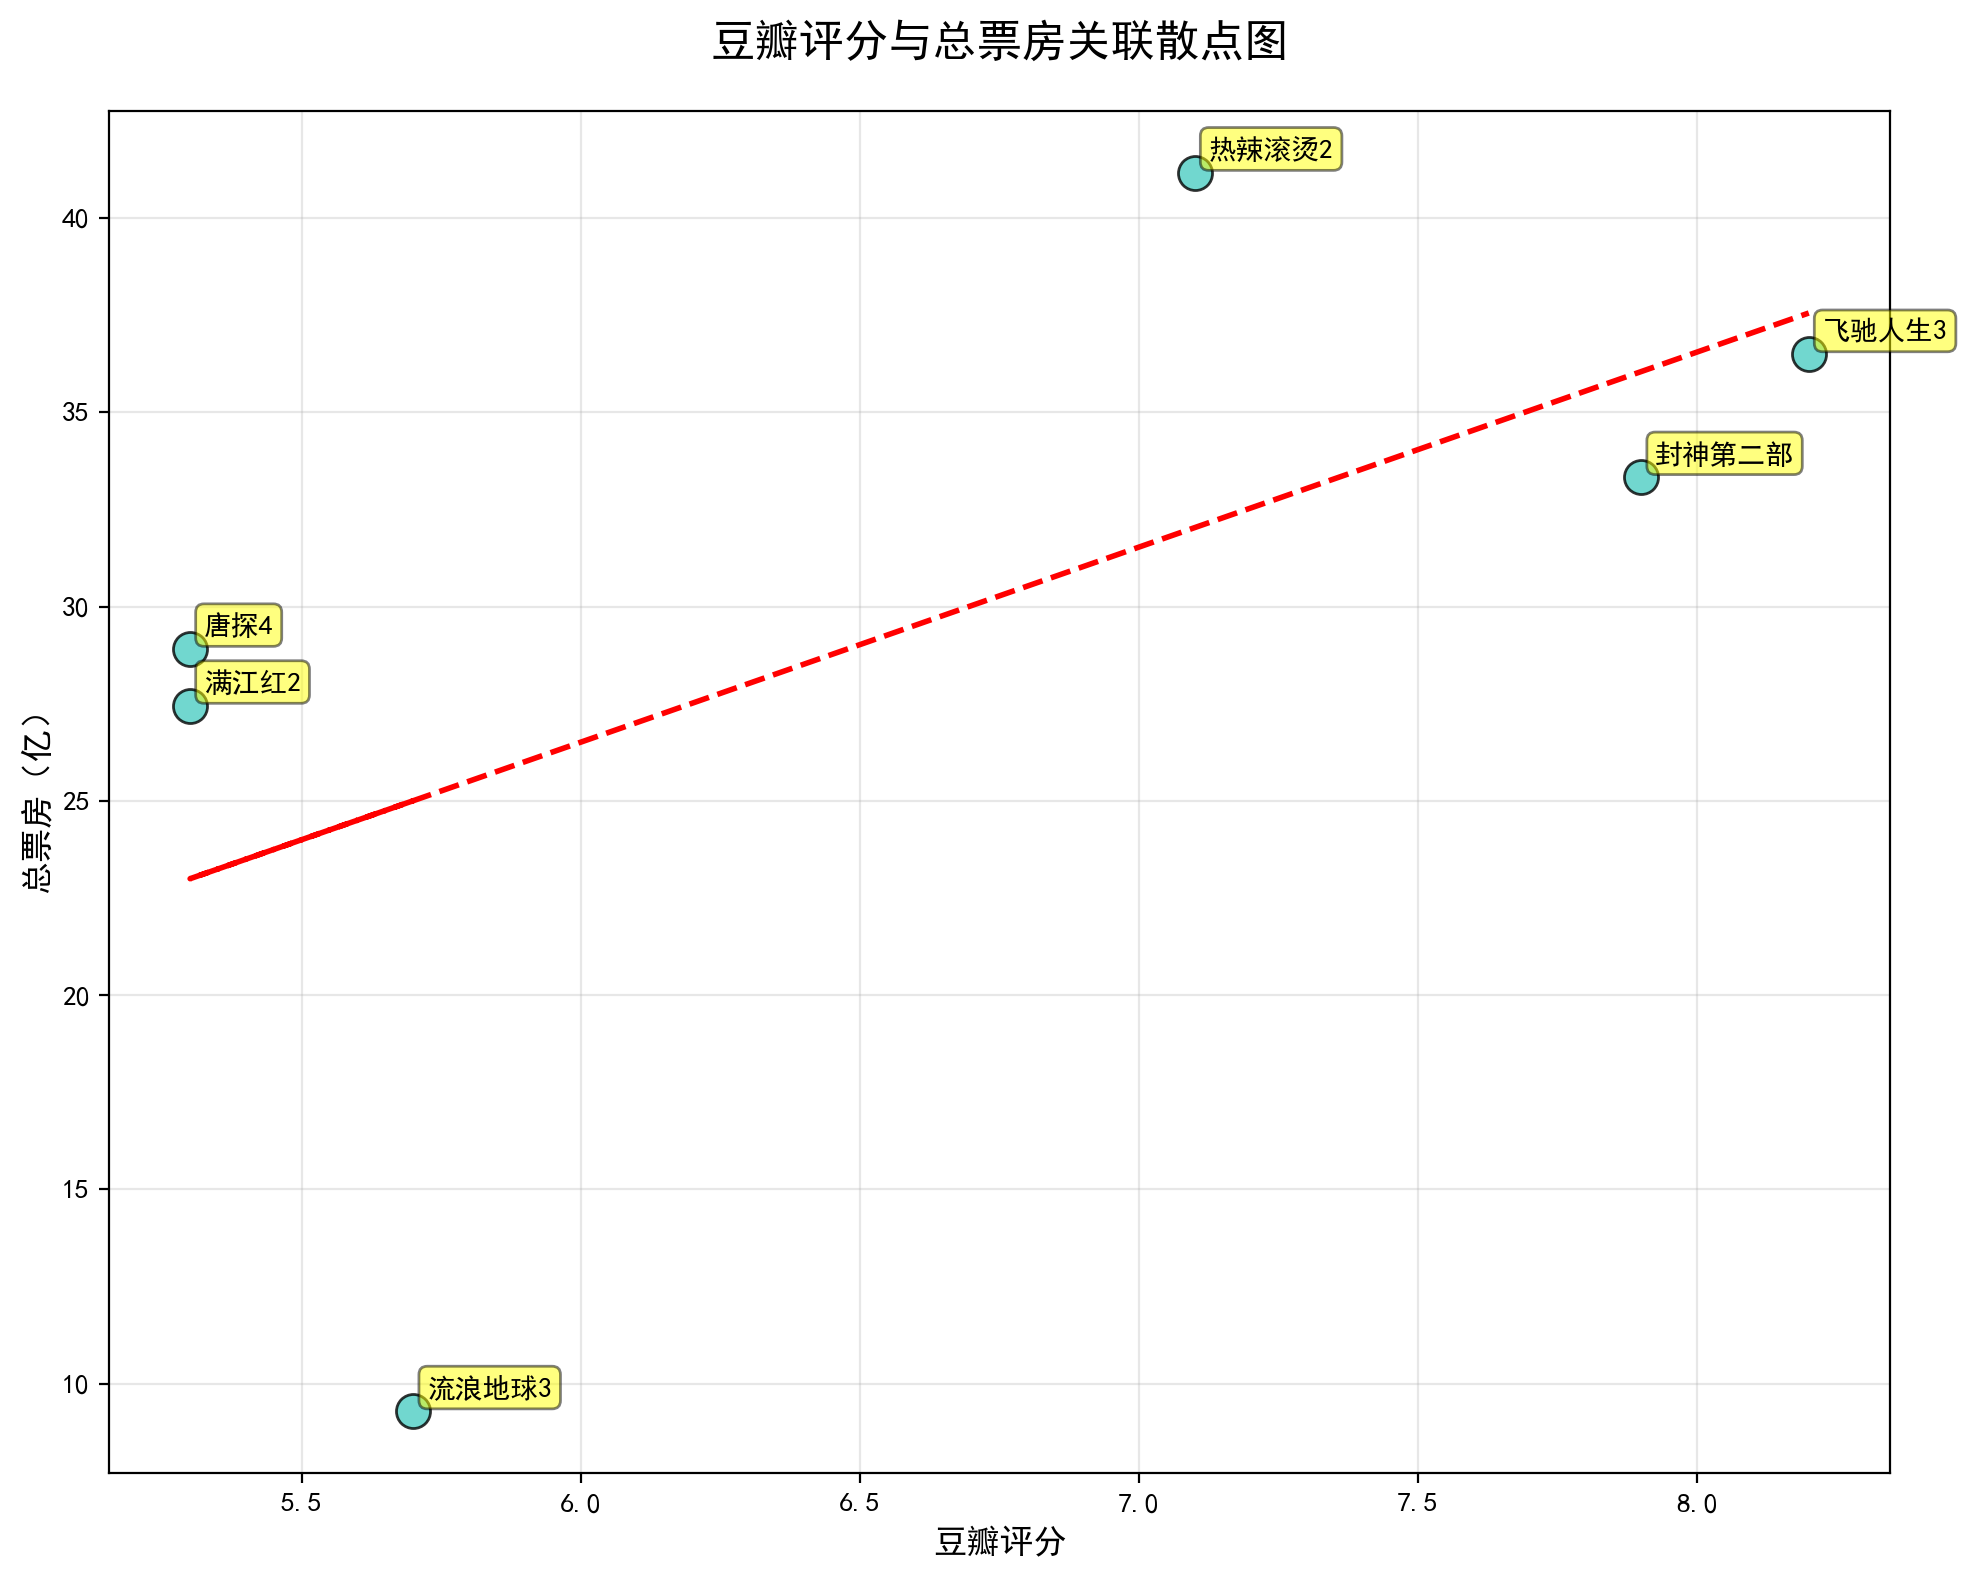

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# 配置Jupyter中文+高清显示
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["figure.figsize"] = (12, 8)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# 加载票房数据（替换为你的CSV路径）
df = pd.read_csv("./movie_box_office_analysis.csv", encoding="utf-8-sig")

# 模拟影评数据（若你的数据含影评，可直接读取）
df["影评"] = [
    "特效炸裂，剧情紧凑，国产科幻天花板！",
    "笑点密集，沈腾演技依旧在线，春节档必看！",
    "剧情拖沓，逻辑混乱，浪费演员阵容",
    "女性视角很细腻，情感共鸣强，哭了好几次",
    "场面宏大，特效惊艳，但故事线太散",
    "节奏明快，适合全家观影，春节档黑马"
]
display(df[["电影名称", "影评"]].head())
def plot_scatter(df):
    plt.figure(figsize=(10, 8))
    plt.scatter(
        df["豆瓣评分"],
        df["总票房(亿)"],
        s=150,
        c="#4ECDC4",
        alpha=0.8,
        edgecolors="black"
    )
    # 标注电影名称
    for idx, row in df.iterrows():
        plt.annotate(
            row["电影名称"],
            (row["豆瓣评分"], row["总票房(亿)"]),
            xytext=(5, 5),
            textcoords="offset points",
            bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.5)
        )
    # 拟合线
    z = np.polyfit(df["豆瓣评分"], df["总票房(亿)"], 1)
    p = np.poly1d(z)
    plt.plot(df["豆瓣评分"], p(df["豆瓣评分"]), "r--", linewidth=2)
    
    plt.title("豆瓣评分与总票房关联散点图", fontsize=16, fontweight="bold", pad=20)
    plt.xlabel("豆瓣评分", fontsize=12)
    plt.ylabel("总票房（亿）", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# 执行
plot_scatter(df)

,电影名称,影评
0,流浪地球3,特效炸裂，剧情紧凑，国产科幻天花板！
1,满江红2,笑点密集，沈腾演技依旧在线，春节档必看！
2,唐探4,剧情拖沓，逻辑混乱，浪费演员阵容
3,热辣滚烫2,女性视角很细腻，情感共鸣强，哭了好几次
4,封神第二部,场面宏大，特效惊艳，但故事线太散


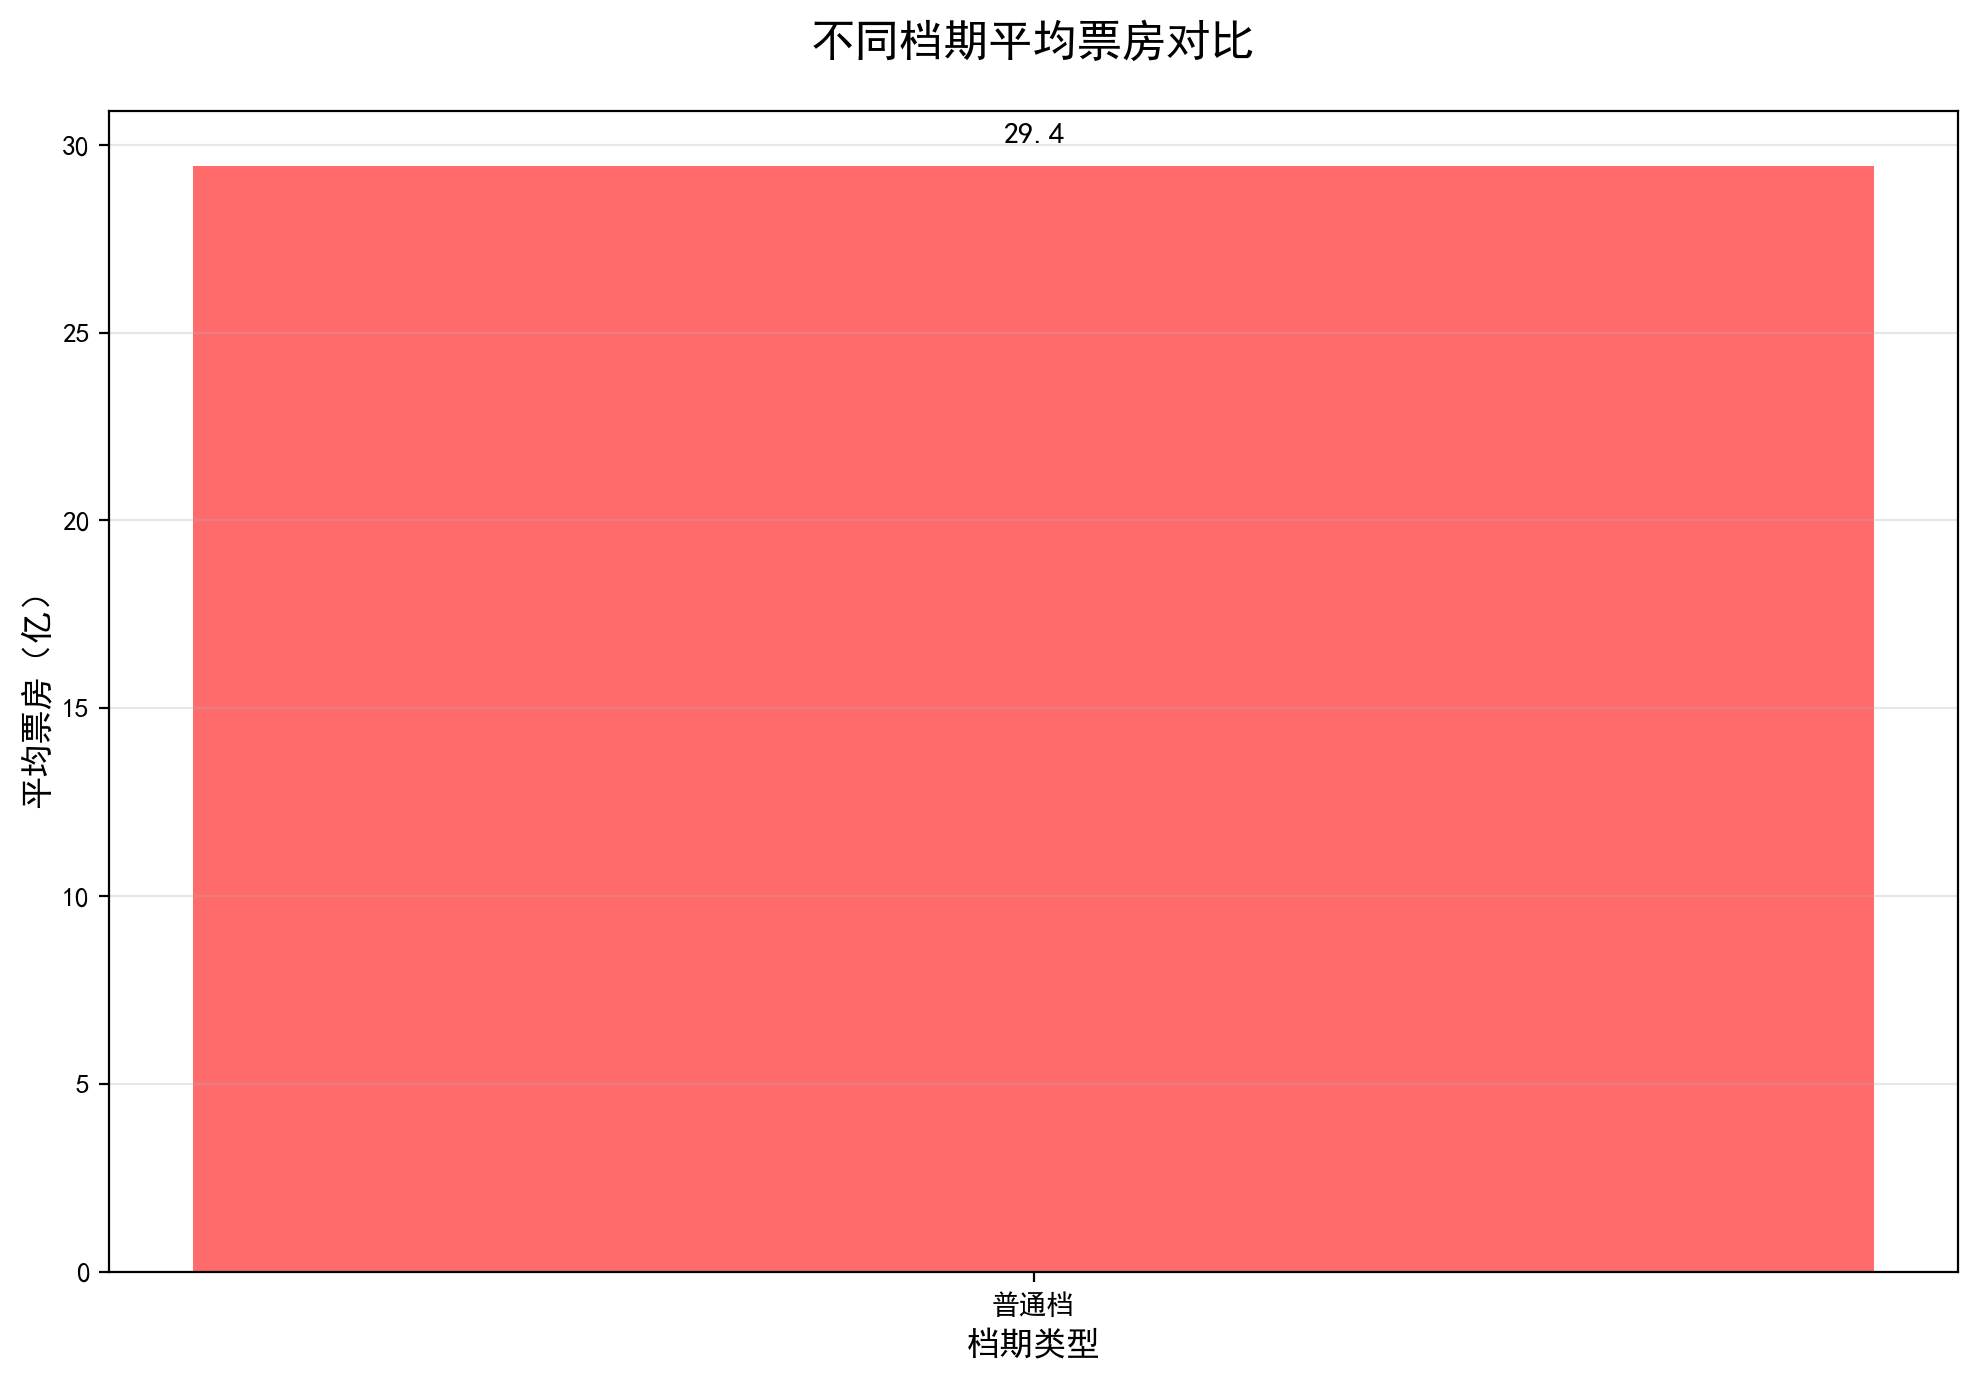

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# 配置Jupyter中文+高清显示
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["figure.figsize"] = (12, 8)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# 加载票房数据（替换为你的CSV路径）
df = pd.read_csv("./movie_box_office_analysis.csv", encoding="utf-8-sig")

# 模拟影评数据（若你的数据含影评，可直接读取）
df["影评"] = [
    "特效炸裂，剧情紧凑，国产科幻天花板！",
    "笑点密集，沈腾演技依旧在线，春节档必看！",
    "剧情拖沓，逻辑混乱，浪费演员阵容",
    "女性视角很细腻，情感共鸣强，哭了好几次",
    "场面宏大，特效惊艳，但故事线太散",
    "节奏明快，适合全家观影，春节档黑马"
]
display(df[["电影名称", "影评"]].head())
def plot_bar_schedule(df):
    # 强制保留所有档期类型（避免缺失）
    schedule_mean = df.groupby("档期类型", dropna=False)["总票房(亿)"].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(10, 7))
    bars = plt.bar(
        schedule_mean.index,
        schedule_mean.values,
        color=["#FF6B6B", "#4ECDC4", "#45B7D1", "#96CEB4"]
    )
    # 标注均值
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2.,
            height + 0.5,
            f"{height:.1f}",
            ha="center",
            va="bottom",
            fontsize=11,
            fontweight="bold"
        )
    
    plt.title("不同档期平均票房对比", fontsize=16, fontweight="bold", pad=20)
    plt.xlabel("档期类型", fontsize=12)
    plt.ylabel("平均票房（亿）", fontsize=12)
    plt.grid(axis="y", alpha=0.3)
    plt.tight_layout()
    plt.show()

# 执行
plot_bar_schedule(df)

In [16]:
print(df["档期类型"].value_counts())

档期类型
普通档    6
Name: count, dtype: int64
